In [81]:
# Dependencies
import pandas as pd
import numpy as np
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [82]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [83]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [84]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = []
june_temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [85]:
#  3. Convert the June temperatures to a list.
# Not sure about this ask. june_temps is already a list of tuples.
june_temps = list(np.ravel(june_temps))
june_temps

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [86]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_df = pd.DataFrame(june_temps, columns=['June Temps'])
temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [87]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [88]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = []
dec_temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [89]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(dec_temps))

In [90]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['Dec Temps'])
dec_temps_df

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [91]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3. Query to calculate precipitation statistics for June

In [92]:
june_prcp = []
june_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

june_prcp_df = pd.DataFrame(june_prcp, columns=['June Precip'])

june_prcp_df.describe()

,June Precip
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [122]:
june_prcp_df[(june_prcp_df['June Precip']>0.5)].count()

June Precip    116
dtype: int64

<AxesSubplot:title={'center':'June Precipitation'}, ylabel='Precipitation'>

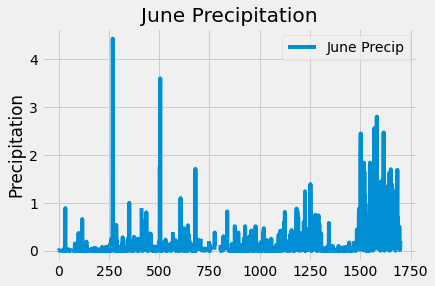

In [93]:
june_prcp_df.plot(title="June Precipitation", ylabel='Precipitation')

In [109]:
dec_prcp = []
dec_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

dec_prcp_df = pd.DataFrame(dec_prcp, columns=['Dec Precip'])

dec_prcp_df.describe()

,Dec Precip
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [121]:
dec_prcp_df[(dec_prcp_df['Dec Precip']>0.5)].count()

Dec Precip    164
dtype: int64

<AxesSubplot:title={'center':'December Precipitation'}, ylabel='Precipitation'>

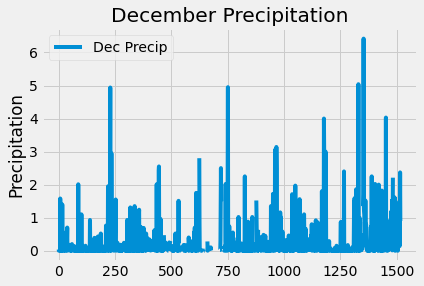

In [110]:
dec_prcp_df.plot(title="December Precipitation", ylabel='Precipitation')